# Welcome to My Covid19 Data Analysis Notebook
    
This is base ont [COVID19 Data Analysis Using Python](https://www.coursera.org/learn/covid19-data-analysis-using-python/home/welcome) from Coursera with the COVID19 dataset, published by John Hopkins University, under the guidance of Ahmad Varasteh -  Data Mining and Machine Learning Instructor

## Structure

<p>1.Importing COVID19 dataset and preparing it for the analysis by dropping columns and aggregating rows.

2.Deciding on and calculating a good measure for our analysis.

3.Merging two datasets and finding correlations among our data.

4.Visualizing our analysis results using Seaborn.<p>

1. Import the modules

In [320]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
print('Modules are imported.')

Modules are imported.


2. Import covid19 dataset

In [321]:
corona_data = pd.read_csv('covid19_Confirmed_dataset.csv')
corona_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [322]:
# Check the shape of the dataframe
corona_data.shape

(266, 104)

3. Delete missing data and unused columns 

In [323]:
# inplace is to overwrite on corona_data without create a new df
corona_data.dropna(axis=0, how ='all', inplace=True)
corona_data.drop(['Lat','Long'],axis=1,inplace=True)

In [324]:
corona_data.shape
# there is no any change in number of rows after deleting NA

(266, 102)

In [325]:
corona_data.head()

,Province/State,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


4. Aggregating the rows by the country

In [326]:
corona_data_aggregated = corona_data.groupby("Country/Region").sum()

In [327]:
corona_data_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [328]:
corona_data_aggregated.shape

(187, 100)

4. Visualizing data related to some countries 

Text(0, 0.5, 'Number of Infection')

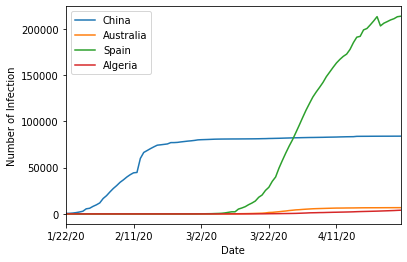

In [329]:
corona_data_aggregated.loc['China'].plot()
corona_data_aggregated.loc['Australia'].plot()
corona_data_aggregated.loc['Spain'].plot()
corona_data_aggregated.loc['Algeria'].plot()

plt.legend()
plt.xlabel('Date')
plt.ylabel('Number of Infection')

5. Calculating a measure

Caculating the first derivative of the curve

Text(0, 0.5, 'Number of Infection')

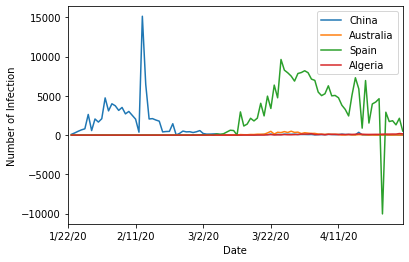

In [330]:
corona_data_aggregated.loc['China'].diff().plot()
corona_data_aggregated.loc['Australia'].diff().plot()
corona_data_aggregated.loc['Spain'].diff().plot()
corona_data_aggregated.loc['Algeria'].diff().plot()

plt.legend()
plt.xlabel('Date')
plt.ylabel('Number of Infection')

Find maximum infection rate for all of the countries

In [331]:
countries = list(corona_data_aggregated.index)
max_infection_rates = []
for country in countries :
    max_infection_rates.append(corona_data_aggregated.loc[country].diff().max())
    
# Insert new column 'max infection rate' into df
corona_data_aggregated['max infection rate'] = max_infection_rates
corona_data_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max infection rate
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


In [332]:
# create a new df with only needed column
infection_rate_per_country= pd.DataFrame(corona_data_aggregated['max infection rate'])
infection_rate_per_country.head()

,max infection rate
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0


6. Import the WorldHappinessReport dataset

In [333]:
world_happiness = pd.read_csv('worldwide_happiness_report.csv')
world_happiness.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


7. Drop the useless columns

In [334]:
unused_cols =['Overall rank','Score']
world_happiness.drop(unused_cols, axis=1, inplace =True)
world_happiness.head()

,Country or region,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Finland,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,1.396,1.522,0.999,0.557,0.322,0.298


8. changing the indices of the dataframe

In [335]:
world_happiness.columns

Index(['Country or region', 'GDP per capita', 'Social support',
       'Healthy life expectancy', 'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [336]:
world_happiness.set_index(['Country or region'],inplace=True)
world_happiness.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,
Finland,1.340,1.587,0.986,0.596,0.153,0.393
Denmark,1.383,1.573,0.996,0.592,0.252,0.410
Norway,1.488,1.582,1.028,0.603,0.271,0.341
Iceland,1.380,1.624,1.026,0.591,0.354,0.118
Netherlands,1.396,1.522,0.999,0.557,0.322,0.298


9. Join two dataset

In [337]:
data = world_happiness.join(infection_rate_per_country,how='inner')
data.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,max infection rate
Finland,1.340,1.587,0.986,0.596,0.153,0.393,267.0
Denmark,1.383,1.573,0.996,0.592,0.252,0.410,391.0
Norway,1.488,1.582,1.028,0.603,0.271,0.341,386.0
Iceland,1.380,1.624,1.026,0.591,0.354,0.118,99.0
Netherlands,1.396,1.522,0.999,0.557,0.322,0.298,1346.0


10. Correlation matrix

In [338]:
data.corr()
# It is representing the currelation between every two columns of our dataset 

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,max infection rate
GDP per capita,1.000000,0.759468,0.863062,0.394603,-0.103870,0.311577,0.250118
Social support,0.759468,1.000000,0.765286,0.456246,-0.061361,0.203225,0.191958
Healthy life expectancy,0.863062,0.765286,1.000000,0.427892,-0.068387,0.314811,0.289263
Freedom to make life choices,0.394603,0.456246,0.427892,1.000000,0.258539,0.446677,0.078196
Generosity,-0.103870,-0.061361,-0.068387,0.258539,1.000000,0.326166,-0.114635
Perceptions of corruption,0.311577,0.203225,0.314811,0.446677,0.326166,1.000000,0.097703
max infection rate,0.250118,0.191958,0.289263,0.078196,-0.114635,0.097703,1.000000


11. Visualization of the results

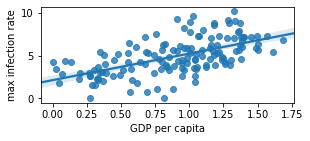

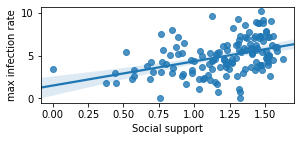

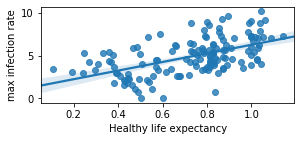

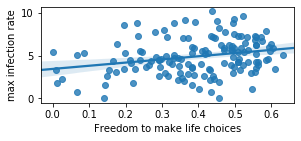

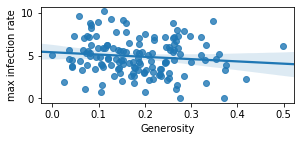

In [339]:
list_of_elements =['GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption']
y = data['max infection rate']

for i in range(len(list_of_elements)): 
    fig = plt.figure(figsize=(10,6))
    ax=plt.subplot(3, 2, i+1)
    sns.regplot(data[list_of_elements[i]],np.log(y))
    plt.xlabel(list_of_elements[i])
plt.close()

## Summary
  
The graphs show that infection rate has a  high correlation with  GDP per capital, Social support, Healthy life expectancy due to some unknown reason.
    
    
### Thank you guys !